In [9]:
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib import rcParams
from matplotlib import colors
import matplotlib.cm as cm
import warnings

%matplotlib notebook

In [10]:
# Loading data

nonlinear = { 'RR':{}, 'CC':{}, 'BC':{}, 'CR':{} }
linear = { 'RR':{}, 'CC':{}, 'BC':{}, 'CR':{} }

files_nonlinear = ['simu_RectangleRectangle.npy', 'simu_CircleCircle.npy', 'simu_BigCircleCircle.npy', 'simu_CircleRectangle.npy']

for i in range(len(files_nonlinear)):
    key = list(nonlinear.keys())[i]
    filename = files_nonlinear[i]
    rhos,etas,X,Y,tspan = np.load(filename ,allow_pickle = True)
    nonlinear[key]['rhos'] = rhos
    nonlinear[key]['etas'] = etas
    nonlinear[key]['X'] = X
    nonlinear[key]['Y'] = Y
    nonlinear[key]['t'] = tspan
        
files_linear = ['simulinear_RectangleRectangle.npy', 'simulinear_CircleCircle.npy', 'simulinear_BigCircleCircle.npy', 'simulinear_CircleRectangle.npy']

for i in range(len(files_linear)):
    key = list(linear.keys())[i]
    filename = files_linear[i]
    rhos,etas,X,Y,tspan = np.load(filename ,allow_pickle = True)
    linear[key]['rhos'] = rhos
    linear[key]['etas'] = etas
    linear[key]['X'] = X
    linear[key]['Y'] = Y
    linear[key]['t'] = tspan
        
L = 7

In [11]:
# Create colormaps and define plot parameters

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

params = {'legend.fontsize': 'medium',
         'axes.labelsize': 11,
         'axes.titlesize':11,
         'xtick.labelsize':11,
         'ytick.labelsize':11,
         'font.family': 'sans-serif',
         'text.usetex': True}
rcParams.update(params)

reds = truncate_colormap(cm.RdPu,minval = -.1, maxval = .7,n = 100)
greens = truncate_colormap(cm.Greens,minval = -.1, maxval = .85,n = 100)

In [19]:
rhos = []
etas = []
key = 'CR'# choose from CR RR CC BC

bottom = 100 # truncate lower density
top = 4500

for i in range(len(nonlinear[key]['rhos'])):
    r1 = nonlinear[key]['rhos'][i].copy() # For Porous-Fisher
    r2 = nonlinear[key]['etas'][i].copy()
    #r1 = linear[key]['rhos'][i].copy() # For Fisher-KPP
    #r2 = linear[key]['etas'][i].copy()
    for i1 in range(len(r1)):
        for j1 in range(len(r1[0])):
            if r1[i1,j1] < bottom:
                r1[i1,j1] = np.nan
            if r2[i1,j1] < bottom:
                r2[i1,j1] = np.nan
    rhos.append(r1)
    etas.append(r2)
rhos = np.array(rhos)
etas = np.array(etas)

<IPython.core.display.Javascript object>


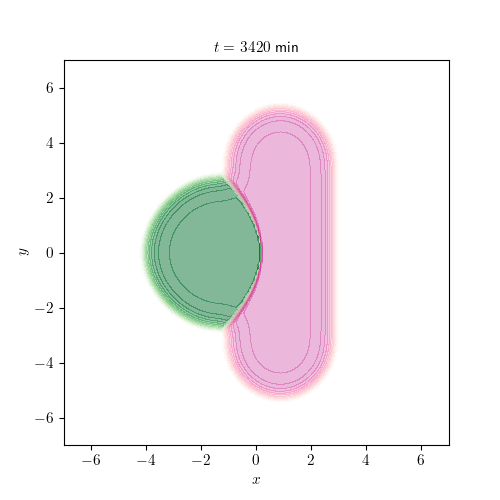

In [21]:
fig,ax = plt.subplots(1,1,figsize = (5,5))

warnings.filterwarnings("ignore")

ax.set_xlim(-L,L)    
ax.set_xlabel('$x$')
ax.set_ylim(-L,L)
ax.set_ylabel('$y$')
ax.set_aspect('equal')
ncont = 14
a = .3
lw = .1

for i in range(len(rhos)):
    ax.contourf(X,Y,rhos[i],ncont ,cmap = greens,vmin = bottom, vmax = top,alpha = .5)
    ax.contourf(X,Y,etas[i],ncont,cmap = reds,vmin = bottom, vmax = top,alpha= a,extend = 'max') 
    ax.set_title('$t = %.0f$ min' % (tspan[i]*60))
    fig.canvas.draw()
    if i == 0:
        time.sleep(2)
    for i in range(1):
        del ax.collections[:]
        del ax.lines[:]
#time.sleep(4)
ax.contourf(X,Y,rhos[-1],ncont ,cmap = greens,vmin = bottom, vmax = top,alpha = .5)
ax.contourf(X,Y,etas[-1],ncont,cmap = reds,vmin = bottom, vmax = top,alpha= a,extend = 'max') 